In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')
print(강서_대여소_ID)

      대여소_ID
0     ST-975
1     ST-837
2     ST-836
3     ST-835
4     ST-834
..       ...
219  ST-1066
220  ST-1065
221  ST-1064
222  ST-1063
223  ST-1062

[224 rows x 1 columns]


In [8]:
강서_데이터 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')
print(강서_데이터)

              기준_날짜  기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수  전체_이용_분  전체_이용_거리  요일
0        2023-02-13     150   ST-1517   ST-1517      1        1        50   0
1        2023-02-13     835   ST-1718   ST-1718      1        1        10   0
2        2023-02-13    1250   ST-2028   ST-2028      1        1        20   0
3        2023-02-13    1815   ST-1506   ST-1506      1        1        10   0
4        2023-02-13    1845   ST-2045   ST-2045      1        1        20   0
...             ...     ...       ...       ...    ...      ...       ...  ..
2345644  2023-12-18    2355   ST-2041   ST-1714      1        5      1020   0
2345645  2023-12-18    2355   ST-1062   ST-1647      1        8      1070   0
2345646  2023-12-18    2355    ST-975    ST-514      1       46      1257   0
2345647  2023-12-18    2355   ST-2871    ST-508      1       13      2246   0
2345648  2023-12-18    2355   ST-2871   ST-1065      1        6       992   0

[2345649 rows x 8 columns]


In [9]:
print(강서_데이터.info())
print(강서_대여소_ID.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345649 entries, 0 to 2345648
Data columns (total 8 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   기준_날짜      object
 1   기준_시간대     int64 
 2   시작_대여소_ID  object
 3   종료_대여소_ID  object
 4   전체_건수      int64 
 5   전체_이용_분    int64 
 6   전체_이용_거리   int64 
 7   요일         int64 
dtypes: int64(5), object(3)
memory usage: 143.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대여소_ID  224 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB
None


# 일별 대여데이터 시각화

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3

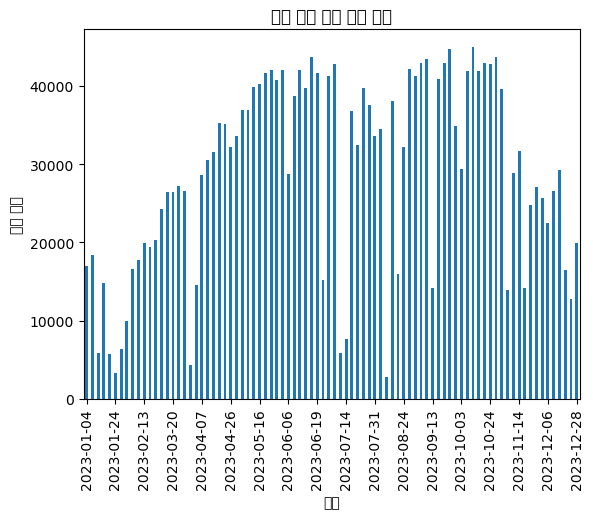

In [16]:
일별_데이터 = 강서_데이터.groupby('기준_날짜')['전체_건수'].sum()

눈금_간격 = 5  # 예시로 눈금 간격을 5로 설정
눈금_위치 = range(0, len(일별_데이터.index), 눈금_간격)
눈금_레이블 = 일별_데이터.index[::눈금_간격]

# 시작 대여소별 대여 건수 시각화
일별_데이터.plot(kind='bar')
plt.title('강서 지역 일별 대여 건수')
plt.xlabel('날짜')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.xticks(눈금_위치, 눈금_레이블, rotation=90)
plt.show()




# 시간별 데이터 시각화

In [17]:
def divide_time_range(time):
    if time < 600:
        return '00:00~06:00'
    elif time < 1000:
        return '06:00~10:00'
    elif time < 1600:
        return '10:00~16:00'
    elif time < 2000:
        return '16:00~20:00'
    else:
        return '20:00~24:00'

강서_데이터['시간대_구간'] = 강서_데이터['기준_시간대'].apply(divide_time_range)

# 시간대 구간별로 건수 합산
강서_시간대별_건수 = 강서_데이터.groupby('시간대_구간')['전체_건수'].sum()

print(강서_시간대별_건수)

시간대_구간
00:00~06:00    104216
06:00~10:00    639874
10:00~16:00    502497
16:00~20:00    805289
20:00~24:00    439450
Name: 전체_건수, dtype: int64


c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\L

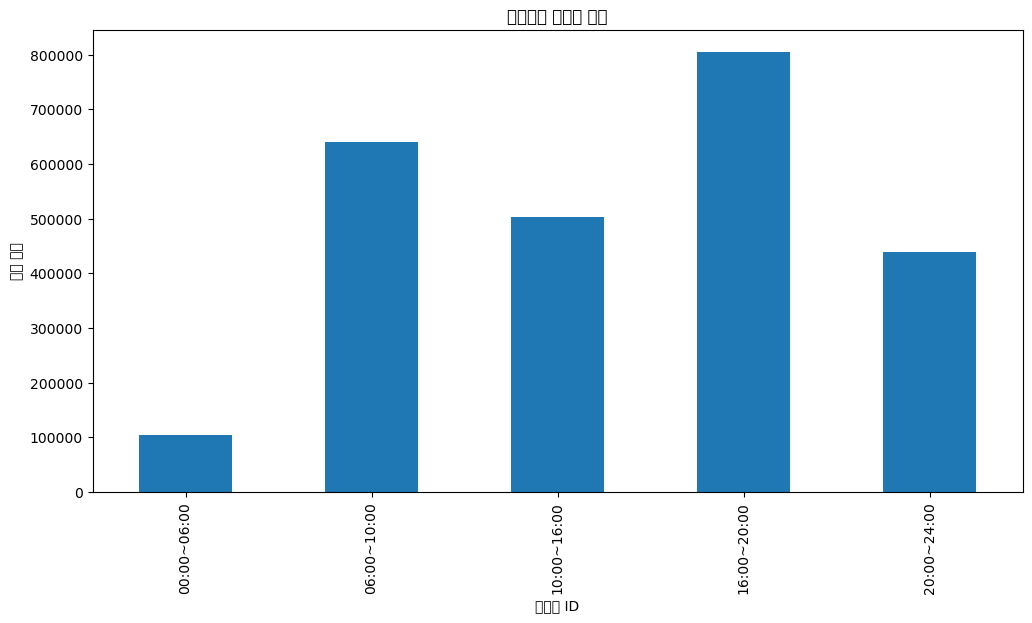

In [18]:
plt.figure(figsize=(12, 6))
강서_시간대별_건수.plot(kind='bar')
plt.title('시간대별 따릉이 확인')
plt.xlabel('대여소 ID')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.show()

# 대여소 별 대여, 반납 비교

In [21]:
import matplotlib.pyplot as plt

# 시작 대여소별 전체 횟수 계산
시작대여소별_전체횟수 = 강서_데이터.groupby('시작_대여소_ID')['전체_건수'].sum()

# 종료 대여소별 전체 횟수 계산
종료대여소별_전체횟수 = 강서_데이터.groupby('종료_대여소_ID')['전체_건수'].sum()



(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current

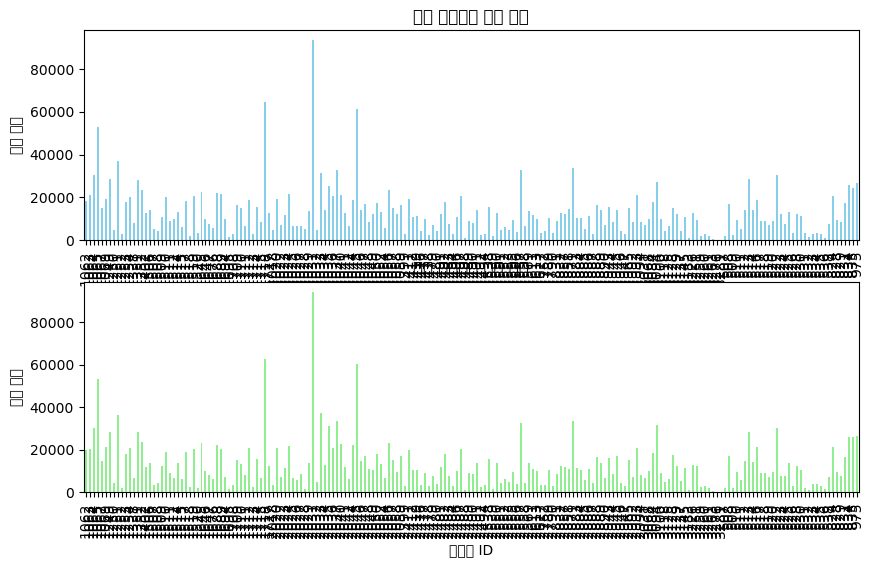

In [33]:
# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# 시작 대여소별 전체 횟수 막대 그래프
plt.subplot(2, 1, 1)
시작대여소별_전체횟수.plot(kind='bar', color='skyblue')
plt.title('시작 대여소별 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)

# 종료 대여소별 전체 횟수 막대 그래프
plt.subplot(2, 1, 2)
종료대여소별_전체횟수.plot(kind='bar', color='lightgreen')
plt.title('종료 대여소별 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, '1063'),
  Text(1, 0, '1064'),
  Text(2, 0, '1065'),
  Text(3, 0, '1249'),
  Text(4, 0, '1251'),
  Text(5, 0, '1254'),
  Text(6, 0, '1351'),
  Text(7, 0, '1352'),
  Text(8, 0, '1510'),
  Text(9, 0, '1519'),
  Text(10, 0, '1645'),
  Text(11, 0, '1688'),
  Text(12, 0, '1689'),
  Text(13, 0, '1718'),
  Text(14, 0, '2024'),
  Text(15, 0, '2031'),
  Text(16, 0, '2033'),
  Text(17, 0, '2035'),
  Text(18, 0, '2036'),
  Text(19, 0, '2037'),
  Text(20, 0, '2040'),
  Text(21, 0, '2045'),
  Text(22, 0, '2056'),
  Text(23, 0, '2487'),
  Text(24, 0, '2557'),
  Text(25, 0, '2871'),
  Text(26, 0, '2993'),
  Text(27, 0, '3094'),
  Text(28, 0, '513'),
  Text(29, 0, '522'),
  Text(30, 0, '824'),
  Text(31, 0, '834'),
  Text(32, 0, '835'),
  Text(33, 0, '975')])

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current

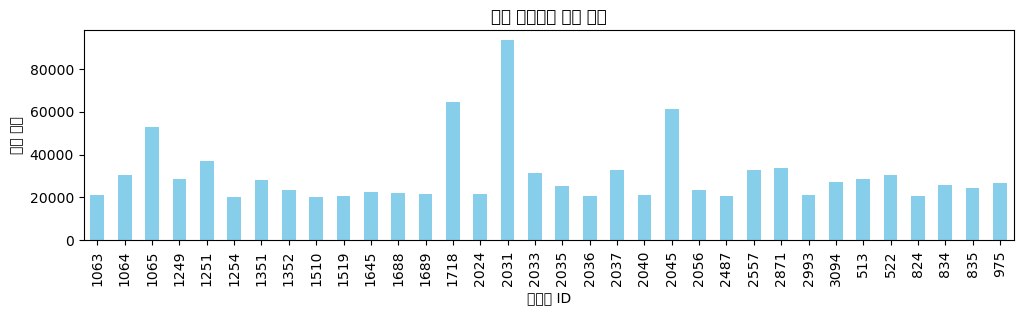

In [36]:
시작대여소_2= 시작대여소별_전체횟수[시작대여소별_전체횟수.values >= 20000]
종료대여소_2 = 종료대여소별_전체횟수[종료대여소별_전체횟수.values >= 20000]

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 시작 대여소별 2만개 이상
plt.subplot(2, 1, 1)
시작대여소_2.plot(kind='bar', color='skyblue')
plt.title('시작 대여소별 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, '1063'),
  Text(1, 0, '1064'),
  Text(2, 0, '1065'),
  Text(3, 0, '1069'),
  Text(4, 0, '1249'),
  Text(5, 0, '1251'),
  Text(6, 0, '1254'),
  Text(7, 0, '1351'),
  Text(8, 0, '1352'),
  Text(9, 0, '1519'),
  Text(10, 0, '1645'),
  Text(11, 0, '1688'),
  Text(12, 0, '1689'),
  Text(13, 0, '1712'),
  Text(14, 0, '1718'),
  Text(15, 0, '2020'),
  Text(16, 0, '2024'),
  Text(17, 0, '2031'),
  Text(18, 0, '2033'),
  Text(19, 0, '2035'),
  Text(20, 0, '2036'),
  Text(21, 0, '2037'),
  Text(22, 0, '2040'),
  Text(23, 0, '2044'),
  Text(24, 0, '2045'),
  Text(25, 0, '2056'),
  Text(26, 0, '2487'),
  Text(27, 0, '2557'),
  Text(28, 0, '2871'),
  Text(29, 0, '2993'),
  Text(30, 0, '3094'),
  Text(31, 0, '513'),
  Text(32, 0, '516'),
  Text(33, 0, '522'),
  Text(34, 0, '824'),
  Text(35, 0, '834'),
  Text(36

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from curre

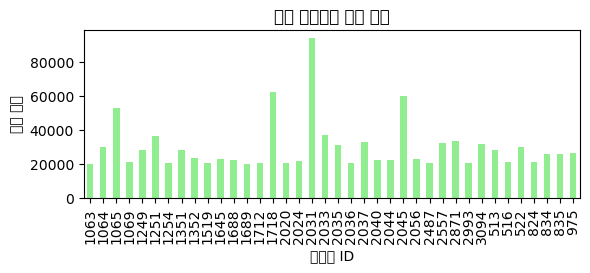

In [37]:
# 종료 대여소 2만개 이상
plt.subplot(2, 1, 2)
종료대여소_2.plot(kind='bar', color='lightgreen')
plt.title('종료 대여소별 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)